In [1]:
import numpy as np
from sklearn.datasets import make_friedman1
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Create regression problem
n_points = 1000
x, y = make_friedman1(n_samples=n_points, n_features=12, noise=3, random_state=100)
tree = RandomForestRegressor(n_estimators=1000, max_features=m, random_state=100)
depths = range(1,13)
r2_scores = []
training_losses = []

# Split into train/test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=100)



In [5]:
x_train.shape

(670, 12)

In [2]:


# Loop over possible values of m
for depth in range depths :

    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

# Find the best m
best_m = m_values[np.argmax(r2_scores)]
best_r2 = max(r2_scores)

print(f"Best m: {best_m}")
print(f"Best R² score: {best_r2:.4f}")


Best m: 7
Best R² score: 0.6365


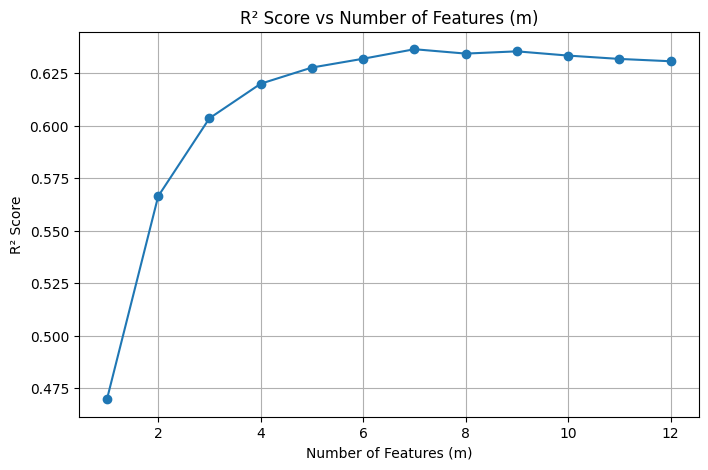

In [6]:
plt.figure(figsize=(8, 5))
plt.plot(m_values, r2_scores, marker='o')
plt.xlabel('Number of Features (m)')
plt.ylabel('R² Score')
plt.title('R² Score vs Number of Features (m)')
plt.grid(True)
plt.show()

Question 4,

In [101]:
from sklearn.datasets import make_blobs
from sklearn.metrics import zero_one_loss
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

x, y = make_blobs(n_samples=1500, n_features=15, centers=2, random_state=20, cluster_std=6)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=20)



In [102]:
gamma_values = [0.05, 0.1, 0.5, 1, 2] # values of γ in question (where γ = 0.05, 0.1, 0.5, 1, 2).
losses = {}

# Train and evaluate for each γ
for gamma in gamma_values:
    clf = GradientBoostingClassifier(n_estimators=200, learning_rate=gamma, random_state=20) #B = 200 rounds
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    loss = zero_one_loss(y_test, y_pred) #Evaluate the classifier on the test data based on the zero-one loss
    losses[gamma] = loss
    print(f"γ = {gamma}, Zero-One Loss = {loss:.4f}")

#  identify the optimal value of γ.
best_gamma = min(losses, key=losses.get)
print(f"\nOptimal γ (learning_rate): {best_gamma} with Zero-One Loss = {losses[best_gamma]:.4f}")

γ = 0.05, Zero-One Loss = 0.0061
γ = 0.1, Zero-One Loss = 0.0061
γ = 0.5, Zero-One Loss = 0.0040
γ = 1, Zero-One Loss = 0.0061
γ = 2, Zero-One Loss = 0.0242

Optimal γ (learning_rate): 0.5 with Zero-One Loss = 0.0040


Question 5,

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

df1 = pd.read_csv('Hitters.csv')
df1.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
1,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
2,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
3,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
4,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [35]:
print("Unique values in 'League':", df1['League'].unique())
print("Unique values in 'Division':", df1['Division'].unique())
print("Unique values in 'NewLeague':", df1['NewLeague'].unique())

Unique values in 'League': ['N' 'A']
Unique values in 'Division': ['W' 'E']
Unique values in 'NewLeague': ['N' 'A']


In [36]:
df1.isna().sum()

,0
AtBat,0
Hits,0
HmRun,0
Runs,0
RBI,0
Walks,0
Years,0
CAtBat,0
CHits,0
CHmRun,0


In [37]:
df1.dtypes

,0
AtBat,int64
Hits,int64
HmRun,int64
Runs,int64
RBI,int64
Walks,int64
Years,int64
CAtBat,int64
CHits,int64
CHmRun,int64


In [38]:
df_encoded = df1.copy()

#Using LabelEncoder
cat_cols = ['League', 'Division', 'NewLeague']
le = LabelEncoder()
for col in cat_cols:
    df1[col] = le.fit_transform(df1[col])

print("Label Encoded Output (first 5 rows):")
print(df1[cat_cols].head())


# Using pd.get_dummies()

df_dummies = pd.get_dummies(df_encoded, columns=cat_cols, drop_first=False)  # keep all categories
print("\nOne-Hot Encoded Output (first 5 rows):")
print(df_dummies.filter(regex='League|Division|NewLeague').head())


Label Encoded Output (first 5 rows):
   League  Division  NewLeague
0       1         1          1
1       0         1          0
2       1         0          1
3       1         0          1
4       0         1          0

One-Hot Encoded Output (first 5 rows):
   League_A  League_N  Division_E  Division_W  NewLeague_A  NewLeague_N
0     False      True       False        True        False         True
1      True     False       False        True         True        False
2     False      True        True       False        False         True
3     False      True        True       False        False         True
4      True     False       False        True         True        False


In [39]:
df1.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')

In [42]:
X = df1.drop(['Salary'], axis=1)
y = df1['Salary']
mse_scores = []

# Apply Principal Component Regression (PCR) using all possible numbers of principal components.
for n in range(1, X.shape[1] + 1):
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X)
    # Perform 10-fold cross-validation
    model = LinearRegression()
    neg_mse = cross_val_score(model, X_pca, y, cv=10, scoring='neg_mean_squared_error')
    mse = -np.mean(neg_mse)
    mse_scores.append(mse)



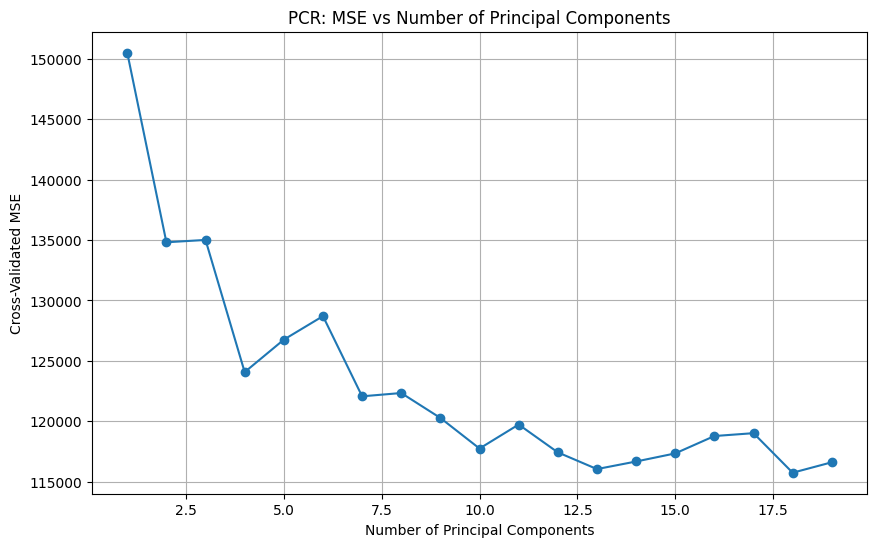

Optimal number of components: 18
Minimum CV MSE: 115733.66


In [43]:

# Plot mean squared error (MSE) as a function of the number of components
plt.figure(figsize=(10,6))
plt.plot(range(1, X.shape[1] + 1), mse_scores, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cross-Validated MSE')
plt.title('PCR: MSE vs Number of Principal Components')
plt.grid(True)
plt.show()

#determine the optimal number of components based on the MSE.
optimal_n = np.argmin(mse_scores) + 1
print(f"Optimal number of components: {optimal_n}")
print(f"Minimum CV MSE: {mse_scores[optimal_n - 1]:.2f}")

In [66]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Range of lambda values is specified as function of λ ∈ {10, 20, . . . , 1000}"
lambdas = np.arange(10, 1001, 10)

mse_scores = []
mse_std = []

lasso = Lasso(fit_intercept=True, max_iter=10000)

for alpha in lambdas:
    lasso.alpha = alpha
    neg_mse = cross_val_score(lasso, X, y, scoring='neg_mean_squared_error', cv=10)
    mse = -np.mean(neg_mse)
    std = np.std(neg_mse)
    mse_scores.append(mse)
    mse_std.append(std)



In [68]:
import pandas as pd

# Create a DataFrame to sort and analyze results
results_df = pd.DataFrame({
    'lambda': lambdas,
    'mean_mse': mse_scores,
    'std_mse': mse_std
})

# Sort by lowest mean MSE
top_results = results_df.sort_values(by='mean_mse').head(5)

print("Top 5 lambda values with lowest mean MSE:")
print(top_results)

# If you want to see fold-wise MSEs for the top 5:
print("\nDetailed per-fold MSEs for top 5 lambdas:")
for alpha in top_results['lambda']:
    lasso.alpha = alpha
    neg_mse = cross_val_score(lasso, X, y, scoring='neg_mean_squared_error', cv=10)
    mse_scores_per_fold = -neg_mse
    print(f"\nAlpha: {alpha}")
    print(f"MSEs across folds: {mse_scores_per_fold}")
    print(f"Mean MSE: {np.mean(mse_scores_per_fold):.4f}")
    print(f"Std Dev: {np.std(mse_scores_per_fold):.4f}")


Top 5 lambda values with lowest mean MSE:
    lambda       mean_mse       std_mse
11     120  113361.943238  66295.881346
10     110  113372.472226  66103.545794
12     130  113394.811043  66496.267555
9      100  113436.809499  65916.116015
13     140  113440.523750  66698.758631

Detailed per-fold MSEs for top 5 lambdas:

Alpha: 120
MSEs across folds: [ 88602.66794306  28645.81888105 167678.26744428  85833.02969567
  83125.23200585  64722.31479429 282693.06656196 126753.46753814
 109754.8565497   95810.71097064]
Mean MSE: 113361.9432
Std Dev: 66295.8813

Alpha: 110
MSEs across folds: [ 89028.67587457  28631.85618374 167211.97292144  85668.23309017
  83258.32218954  64953.07016076 282168.73481534 127048.44780307
 110164.23811265  95591.17111092]
Mean MSE: 113372.4722
Std Dev: 66103.5458

Alpha: 130
MSEs across folds: [ 88180.84712213  28663.12168137 168153.13006994  86002.43390584
  83001.35997878  64496.64587006 283220.94871742 126828.16087969
 109357.53058806  96043.93161382]
Mean M

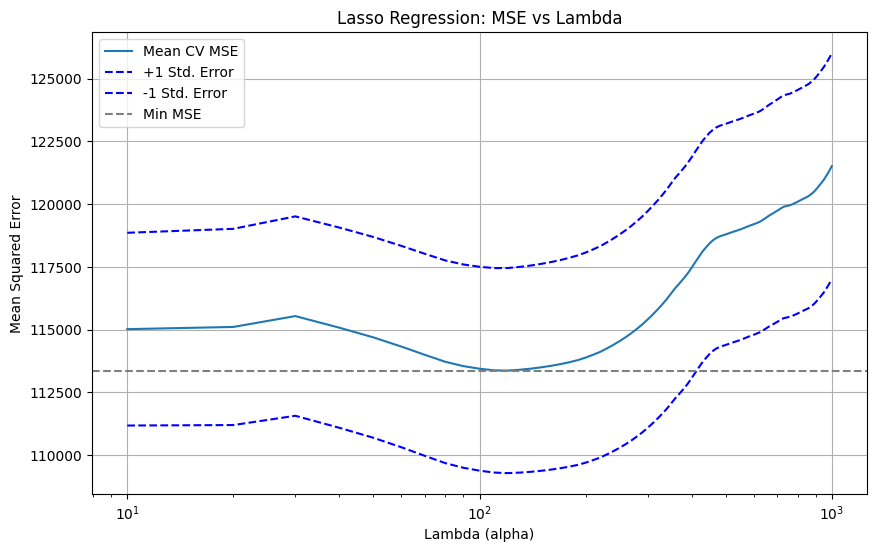

In [67]:

# Plot MSE vs Lambda
plt.figure(figsize=(10,6))
plt.semilogx(lambdas, mse_scores, label='Mean CV MSE')
plt.semilogx(lambdas, np.array(mse_scores) + np.array(mse_std)/np.sqrt(len(X)), 'b--', label='+1 Std. Error')
plt.semilogx(lambdas, np.array(mse_scores) - np.array(mse_std)/np.sqrt(len(X)), 'b--', label='-1 Std. Error')
plt.xlabel('Lambda (alpha)')
plt.ylabel('Mean Squared Error')
plt.title('Lasso Regression: MSE vs Lambda')
plt.axhline(np.min(mse_scores), linestyle='--', color='.5', label='Min MSE')
plt.legend()
plt.grid(True)
plt.show()




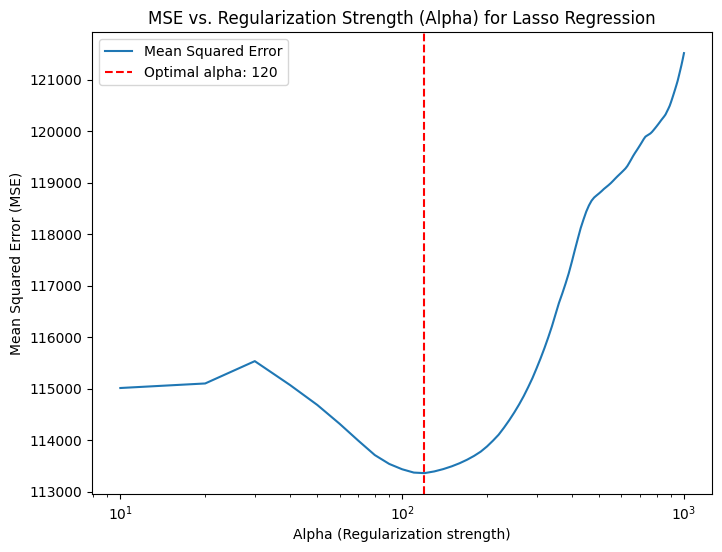

In [64]:
# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(lambdas, mse_scores, label='Mean Squared Error')
plt.xscale('log')  # Log scale for alpha values
plt.xlabel('Alpha (Regularization strength)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Regularization Strength (Alpha) for Lasso Regression')
plt.axvline(x=lambdas[np.argmin(mse_scores)], color='red', linestyle='--', label=f'Optimal alpha: {lambdas[np.argmin(mse_scores)]}')
plt.legend()
plt.show()

In [65]:
# Print best lambda and its MSE
best_index = np.argmin(mse_scores)
print(f"Best lambda (alpha): {lambdas[best_index]}")
print(f"Corresponding CV MSE: {mse_scores[best_index]:.2f}")

Best lambda (alpha): 120
Corresponding CV MSE: 113361.94


Top 5 lambda values with lowest mean MSE:
   lambda       mean_mse       std_mse
1      20  117018.012812  68543.231969
0      10  117602.468820  67436.530188
2      30  118565.191764  70034.569245
3      40  120931.957592  71746.799191
4      50  124006.056571  73739.854844

Detailed per-fold MSEs for top 5 lambdas:

Alpha: 20
MSEs across folds: [ 60347.0468571   47683.09106703 221930.72245773  95216.01285795
 105586.26665834  72059.55637826 271145.76592287 105524.49556373
  79503.15563638 111184.01472364]
Mean MSE: 117018.0128
Std Dev: 68543.2320

Alpha: 10
MSEs across folds: [ 68213.22664853  47883.73053483 211633.29791188  94478.24719615
  99202.36897656  68268.22336542 276127.164998   107747.35424782
  89725.9118956  112745.16242694]
Mean MSE: 117602.4688
Std Dev: 67436.5302

Alpha: 30
MSEs across folds: [ 55754.16291662  47638.25474893 233138.63426401  97374.77747111
 113483.21209687  76173.85853788 269185.03021399 104286.80004854
  76892.7845743  111724.40276654]
Mean MSE: 11856

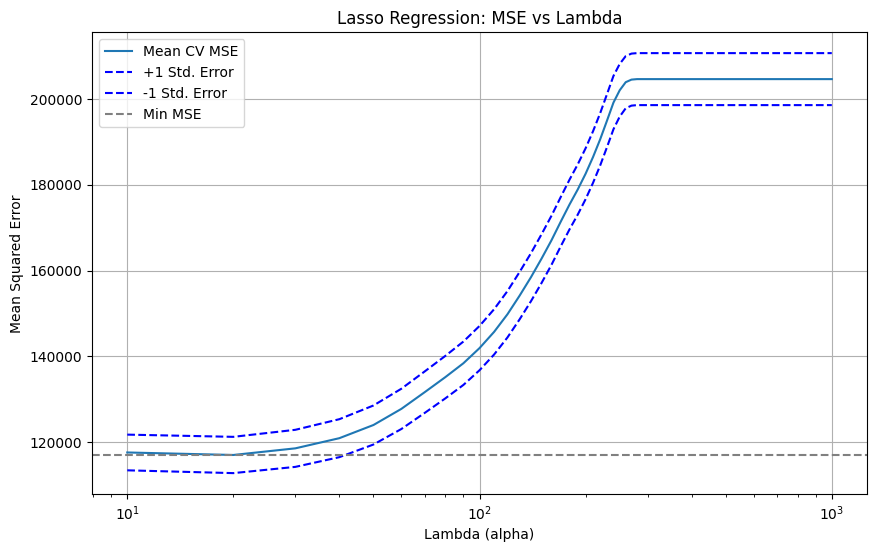

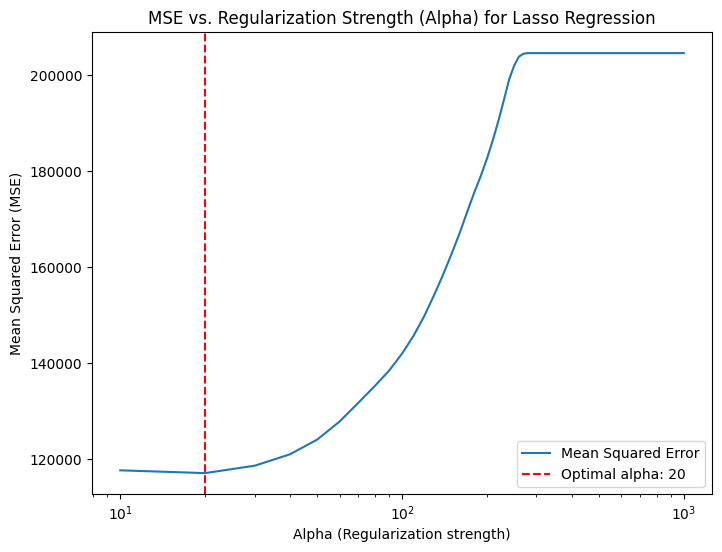

Best lambda (alpha): 20
Corresponding CV MSE: 117018.01


In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Define the lambda values in question
lambdas = np.arange(10, 1001, 10)

mse_scores = []
mse_std = []
for alpha in lambdas:
    pipeline = make_pipeline(StandardScaler(), Lasso(alpha=alpha, fit_intercept=True, max_iter=10000))
    neg_mse = cross_val_score(pipeline, X, y, scoring='neg_mean_squared_error', cv=10)
    mse = -np.mean(neg_mse)
    std = np.std(-neg_mse)
    mse_scores.append(mse)
    mse_std.append(std)

results_df = pd.DataFrame({
    'lambda': lambdas,
    'mean_mse': mse_scores,
    'std_mse': mse_std
})

top_results = results_df.sort_values(by='mean_mse').head(5)

print("Top 5 lambda values with lowest mean MSE:")
print(top_results)

print("\nDetailed per-fold MSEs for top 5 lambdas:")
for alpha in top_results['lambda']:
    pipeline = make_pipeline(StandardScaler(), Lasso(alpha=alpha, fit_intercept=True, max_iter=10000))
    neg_mse = cross_val_score(pipeline, X, y, scoring='neg_mean_squared_error', cv=10)
    mse_scores_per_fold = -neg_mse
    print(f"\nAlpha: {alpha}")
    print(f"MSEs across folds: {mse_scores_per_fold}")
    print(f"Mean MSE: {np.mean(mse_scores_per_fold):.4f}")
    print(f"Std Dev: {np.std(mse_scores_per_fold):.4f}")

# Plot MSE vs Lambda with error bands
plt.figure(figsize=(10,6))
plt.semilogx(lambdas, mse_scores, label='Mean CV MSE')
plt.semilogx(lambdas, np.array(mse_scores) + np.array(mse_std)/np.sqrt(len(X)), 'b--', label='+1 Std. Error')
plt.semilogx(lambdas, np.array(mse_scores) - np.array(mse_std)/np.sqrt(len(X)), 'b--', label='-1 Std. Error')
plt.xlabel('Lambda (alpha)')
plt.ylabel('Mean Squared Error')
plt.title('Lasso Regression: MSE vs Lambda')
plt.axhline(np.min(mse_scores), linestyle='--', color='.5', label='Min MSE')
plt.legend()
plt.grid(True)
plt.show()

# Plot MSE vs Lambda (log-scale)
plt.figure(figsize=(8, 6))
plt.plot(lambdas, mse_scores, label='Mean Squared Error')
plt.xscale('log')
plt.xlabel('Alpha (Regularization strength)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Regularization Strength (Alpha) for Lasso Regression')
plt.axvline(x=lambdas[np.argmin(mse_scores)], color='red', linestyle='--', label=f'Optimal alpha: {lambdas[np.argmin(mse_scores)]}')
plt.legend()
plt.show()

# Print best lambda and its MSE
best_index = np.argmin(mse_scores)
print(f"Best lambda (alpha): {lambdas[best_index]}")
print(f"Corresponding CV MSE: {mse_scores[best_index]:.2f}")


Question 6 ,

In [70]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

df = pd.read_csv('devices.csv')
df.columns

Index(['type', 'warranty', 'release', 'hours', 'incidents'], dtype='object')

In [73]:
df.head()

,type,warranty,release,hours,incidents
0,1,1,1,129,1
1,1,1,2,1099,2
2,1,1,3,1517,2
3,2,1,1,44885,6
4,2,1,2,28609,9


In [71]:
model = smf.glm(formula='incidents ~ C(type) + C(warranty) + C(release) + hours',
                data=df,family=sm.families.Poisson()).fit()
print(model.summary())



                 Generalized Linear Model Regression Results                  
Dep. Variable:              incidents   No. Observations:                   40
Model:                            GLM   Df Residuals:                       30
Model Family:                 Poisson   Df Model:                            9
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -62.273
Date:                Wed, 30 Apr 2025   Deviance:                       17.498
Time:                        03:16:48   Pearson chi2:                     14.5
No. Iterations:                     5   Pseudo R-squ. (CS):             0.6630
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3653      0.349  

In [72]:
coefficients = model.params
conf_int = model.conf_int()
conf_int.columns = ['2.5%', '97.5%']
summary_table = pd.concat([coefficients, conf_int], axis=1)
summary_table.columns = ['Coefficient', 'CI Lower (2.5%)', 'CI Upper (97.5%)']
print(summary_table)


                  Coefficient  CI Lower (2.5%)  CI Upper (97.5%)
Intercept            0.365285        -0.319667          1.050237
C(type)[T.2]         0.738636        -0.014449          1.491721
C(type)[T.3]        -0.123568        -0.798034          0.550898
C(type)[T.4]        -0.081157        -0.765731          0.603416
C(type)[T.5]        -0.228041        -0.971906          0.515824
C(warranty)[T.2]     0.305896        -0.123655          0.735446
C(release)[T.2]      0.204272        -0.337213          0.745758
C(release)[T.3]      0.331986        -0.253611          0.917583
C(release)[T.4]      0.215192        -0.492850          0.923234
hours                0.000020        -0.000008          0.000048


In [82]:
coefficients = model.params
# Bootstrapping Process ---
n_bootstraps = 1000  # Number of bootstrap samples
bootstrap_coefficients = []
# Generate 1000 bootstrap samples and fit the model to each
for i in range(n_bootstraps):
    bootstrap_sample = df.sample(n=len(df), replace=True)  # Sample with replacement

    bootstrap_model = smf.glm(formula='incidents ~ C(type, levels=df["type"].unique()) + C(warranty, levels=df["warranty"].unique()) + C(release, levels=df["release"].unique()) + hours',
                               data=bootstrap_sample, family=sm.families.Poisson()).fit()

    bootstrap_coefficients.append(bootstrap_model.params.values)

bootstrap_coefficients = np.array(bootstrap_coefficients)
bootstrap_se = bootstrap_coefficients.std(axis=0)
from scipy.stats import norm
z = norm.ppf(1 - 0.025)
ci_lower_normal = bootstrap_coefficients.mean(axis=0) - z * bootstrap_se
ci_upper_normal = bootstrap_coefficients.mean(axis=0) + z * bootstrap_se
print("\nBootstrapped Standard Errors:")
print(bootstrap_se)
print("\nNormal 95% Confidence Intervals (Lower and Upper):")
for i in range(len(bootstrap_se)):
    print(f"Coefficient {i+1}: [{ci_lower_normal[i]:.4f}, {ci_upper_normal[i]:.4f}]")


Bootstrapped Standard Errors:
[2.59589826e-01 3.65202681e-01 7.25493662e-01 2.50670747e-01
 2.57725636e-01 1.61249452e-01 2.56329145e-01 2.33458723e-01
 3.23846154e-01 2.21704916e-05]

Normal 95% Confidence Intervals (Lower and Upper):
Coefficient 1: [-0.1339, 0.8837]
Coefficient 2: [-0.0222, 1.4094]
Coefficient 3: [-1.5941, 1.2498]
Coefficient 4: [-0.5529, 0.4297]
Coefficient 5: [-0.7011, 0.3092]
Coefficient 6: [-0.0080, 0.6240]
Coefficient 7: [-0.4054, 0.5993]
Coefficient 8: [-0.1689, 0.7462]
Coefficient 9: [-0.4358, 0.8337]
Coefficient 10: [-0.0000, 0.0001]


Question,7

In [89]:
import pandas as pd

dff = pd.read_csv("courier.csv")
dff.head()

,Time,Packages,Distance
0,8.00,2,33.527999
1,9.50,3,10.972800
2,10.75,4,45.719999
3,11.50,3,67.055998
4,12.03,3,103.631997


In [90]:
# A courier company is analyzing their delivery routes to optimize the time spent
#per delivery. The company collected data on various routes to better understand what factors
#influence the total delivery time
X = dff[['Packages', 'Distance']]
y = dff['Time']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   Time   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     261.2
Date:                Wed, 30 Apr 2025   Prob (F-statistic):           4.69e-16
Time:                        04:30:08   Log-Likelihood:                -63.415
No. Observations:                  25   AIC:                             132.8
Df Residuals:                      22   BIC:                             136.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3412      1.097      2.135      0.0

In [91]:
residuals = model.resid
RSS = np.sum(residuals ** 2)
n = len(y)
p = X.shape[1] - 1  # subtract 1 for the intercept

# residual standard deviation
residual_std_dev = np.sqrt(RSS / (n - p - 1))
print("Residual Standard Deviation (RSE):", round(residual_std_dev, 4))

Residual Standard Deviation (RSE): 3.2595


In [100]:
# Overall model P-value (for the F-statistic)
overall_p_value = model.f_pvalue

# P-values for each predictor
p_value_packages = model.pvalues['Packages']
p_value_distance = model.pvalues['Distance']
print(f"Overall Model P-value (F-statistic): {overall_p_value:.4f}")
print(f"P-value for Packages Predictor: {p_value_packages:.4f}")
print(f"P-value for Distance Predictor: {p_value_distance:.4f}")


Overall Model P-value (F-statistic): 0.0000
P-value for Packages Predictor: 0.0000
P-value for Distance Predictor: 0.0006


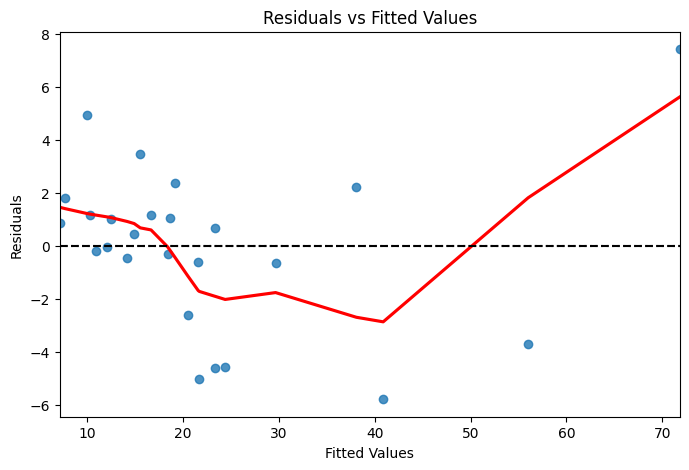

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

#Residual Plot (Residuals vs Fitted Values)
fitted_values = model.fittedvalues

plt.figure(figsize=(8, 5))
sns.residplot(x=fitted_values, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.axhline(0, linestyle='--', color='black')
plt.show()


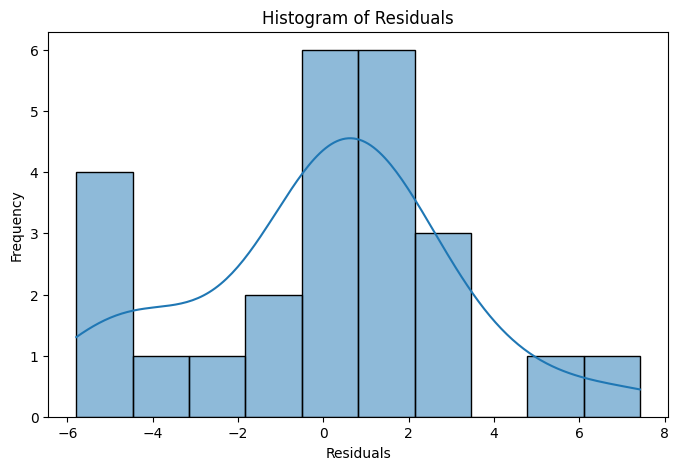

In [93]:
#Histogram of Residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=10)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [95]:
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]
dff['Cooks_Distance'] = cooks_d
most_influential_idx = np.argmax(cooks_d)
print(f"The most influential observation: Index {most_influential_idx}, Cook's Distance = {cooks_d[most_influential_idx]:.4f}")
print("Details of the most influential observation:")
print(dff.iloc[most_influential_idx])


The most influential observation: Index 24, Cook's Distance = 3.4193
Details of the most influential observation:
Time               79.240000
Packages           30.000000
Distance          445.007986
Cooks_Distance      3.419318
Name: 24, dtype: float64


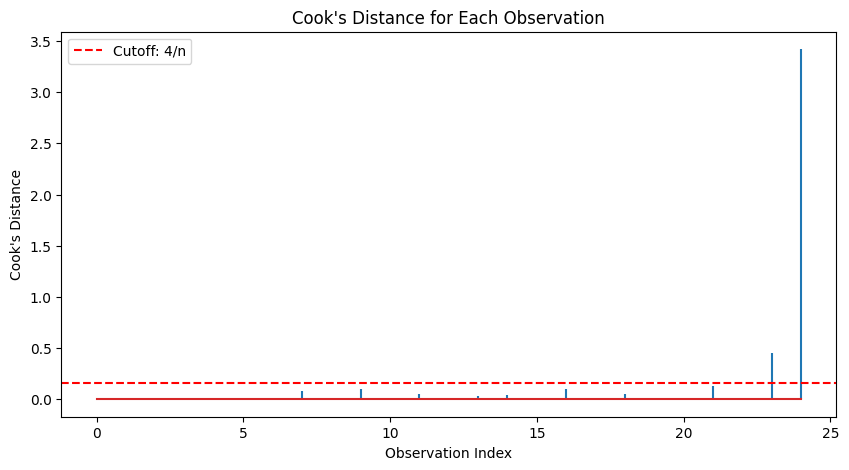

In [98]:
# Plot Cook’s Distance
plt.figure(figsize=(10, 5))
markerline, stemlines, baseline = plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",")
plt.setp(markerline, visible=False)
plt.axhline(4 / n, color='red', linestyle='--', label='Cutoff: 4/n')
plt.title("Cook's Distance for Each Observation")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.legend()
plt.show()



In [99]:

sorted_cooks = sorted(list(enumerate(cooks_d)), key=lambda x: -x[1])
print("Top 3 Influential Observations (Index, Cook's Distance):")
for i in range(3):
    print(f"{sorted_cooks[i][0]}: {sorted_cooks[i][1]:.4f}")

Top 3 Influential Observations (Index, Cook's Distance):
24: 3.4193
23: 0.4510
21: 0.1324
